# Explore Tweets data

In [1]:
import os
import pandas as pd

# Set data directory
data_dir = os.path.realpath("../data/tweets/")

# Check if tweets.h5 exists (if previously converted)
if os.path.exists(os.path.join(data_dir, "tweets.h5")):
    # Store tweets in tweets pandas dataframe
    tweets = pd.read_hdf(os.path.join(data_dir, "tweets.h5"), "tweets")
else:
    # Convert tweets to hdf format
    # ? hdf manages large data well
    tweets = pd.read_csv(os.path.join(data_dir, "tweets.csv"))
    tweets.to_hdf(os.path.join(data_dir, "tweets.h5"), "tweets")

In [2]:
# Convert createdAt to datetime
tweets['createdAt'] = pd.to_datetime(tweets['createdAt'])

# Min and max dates
min_date = tweets['createdAt'].min()
max_date = tweets['createdAt'].max()
print(f"{'Start':<10}{min_date:%Y-%m-%d %H:%M:%S}")
print(f"{'End':<10}{max_date:%Y-%m-%d %H:%M:%S}")

# Duration of the data
duration = pd.Timestamp(max_date) - pd.Timestamp(min_date)
print(f'\n{"Duration":<9} {duration}')

# Group by tweet id
tweets = tweets.groupby("tweetId").first()

# Number of tweets in the first day
print('\n# of Tweets in the 1st day: ', tweets[tweets['createdAt'].dt.day == min_date.day].shape[0])

# Number of tweets in the last day
print('# of Tweets in the 2nd day: ', tweets[tweets['createdAt'].dt.day == max_date.day].shape[0])

# Number of tweets
print('\n# of Tweets: ', tweets.shape[0])

Start     2019-11-11 09:23:24
End       2019-11-12 10:52:09

Duration  1 days 01:28:45

# of Tweets in the 1st day:  3151
# of Tweets in the 2nd day:  648

# of Tweets:  3799


In [3]:
# Add an index that gets incremented for each hour
tweets['hour'] = tweets['createdAt'].dt.hour
tweets.loc[tweets['createdAt'].dt.day == max_date.day, 'hour'] += 24

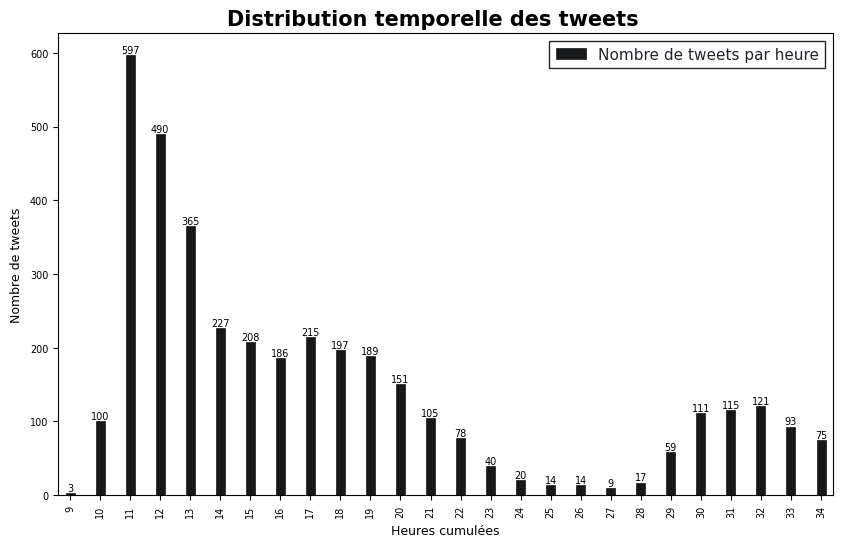

In [4]:
# Set up matplotlib rcParams (runtime configuration) for plot color
# Create gridspec for 2 subplots
import matplotlib
import matplotlib.pyplot as plt

GS = matplotlib.gridspec.GridSpec(1, 1)
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor("white")

# Set title
plt.figtext(
    0.5,
    0.92,
    "\n".join(
        (
            r"Distribution temporelle des tweets",
        )
    ),
    ha="center",
    va="top",
    fontsize=15,
    color="black",
    weight="heavy",
)

# Create subplots
ax = fig.add_subplot(GS[0], projection="rectilinear")

# Set background color
ax.set_facecolor("white")

# Set axis labels
ax.set_xlabel("Heures cumulées", fontsize=9, labelpad=5, color="black")
ax.set_ylabel("Nombre de tweets", fontsize=9, labelpad=5, color="black")

# Set axis ticks color
ax.tick_params(axis="x", colors="black", labelsize=7)
ax.tick_params(axis="y", colors="black", labelsize=7)

# Set axis color
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")

# Select tweets without noise
tweets["hour"].value_counts().sort_index().plot(
    ax=ax,
    kind="bar",
    color="#161819",
    edgecolor="#161819",
    linewidth=0.5,
    width=0.3,
    label="Nombre de tweets par heure",
)

# Add labels to bars
ax.bar_label(ax.containers[0], label_type="edge", color="black", fontsize=7)

# Legend
ax.legend(
    loc="best",
    fontsize=11,
    labelcolor="#22272e",
    markerscale=2,
    facecolor="white",
    title_fontsize=14,
    fancybox=False,
    framealpha=1,
    edgecolor="#22272e"
)

# Save figure
plt.savefig(
    fname=f"./images/st_dbscan/st_dbscan_hour.png",
    dpi=300,
    facecolor=fig.get_facecolor(),
    pad_inches=0.3,
    bbox_inches="tight",
)

plt.show()